In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv('/Users/katychow/Projects/quantified_self/Data/Sleep Data/fitbit_sleep_header_20190128.csv')

In [5]:
df.head()

asleep_cnt  asleep_min  awake_cnt  awake_min dateOfSleep  duration  \
0           0         380          0          0  2018-09-09  24480000   
1           0         416          2          2  2018-09-08  25860000   
2           0         352          1          2  2018-11-06  22320000   
3           0         409          1          6  2018-11-04  26400000   
4           0         133          3          5  2018-11-01   8820000   

   efficiency                  endTime  infoCode        logID  \
0          93  2018-09-09T06:42:00.000         0  19454971019   
1          97  2018-09-08T06:33:30.000         0  19445045219   
2          95  2018-11-06T04:45:30.000         0  20070096843   
3          93  2018-11-04T07:04:00.000         0  20050246210   
4          92  2018-11-01T15:33:30.000         0  20038783045   

   minutesAfterWakeup  minutesAsleep  minutesAwake  minutesToFallAsleep  \
0                   0            380            28                    0   
1                   0            416            15                    0   
2                   0            352            20                    0   
3                   0            409            31                    0   
4                   2            133            12                    0   

   restless_cnt  restless_min                startTime  timeInBed     type  
0            17            28  2018-09-08T23:53:30.000        408  classic  
1             9            13  2018-09-07T23:22:30.000        431  classic  
2             5            18  2018-11-05T22:33:00.000        372  classic  
3            11            25  2018-11-03T23:44:00.000        440  classic  
4             5             9  2018-11-01T13:06:00.000        147  classic

In [6]:
features = ['dateOfSleep','logID','endTime','startTime','timeInBed','asleep_min','awake_min','restless_min']


In [8]:
# now we want to parse endtime/starttime hours:
df_small = df[features].sort_values('dateOfSleep')

In [24]:
df_small.head()

logID                  endTime                startTime  \
dateOfSleep                                                                  
2018-09-08   19445045219  2018-09-08T06:33:30.000  2018-09-07T23:22:30.000   
2018-09-09   19454971019  2018-09-09T06:42:00.000  2018-09-08T23:53:30.000   
2018-10-08   19774997794  2018-10-08T05:51:00.000  2018-10-07T23:48:00.000   
2018-10-09   19774997795  2018-10-09T08:03:00.000  2018-10-09T02:00:30.000   
2018-10-12   19807801480  2018-10-12T06:32:00.000  2018-10-11T21:40:00.000   

             timeInBed  asleep_min  awake_min  restless_min     endDate  \
dateOfSleep                                                               
2018-09-08         431         416          2            13  2018-09-08   
2018-09-09         408         380          0            28  2018-09-09   
2018-10-08         363         347          2            14  2018-10-08   
2018-10-09         362         337          4            21  2018-10-09   
2018-10-12         532         508          0            24  2018-10-12   

            endHour endMin endSec endnnn   startDate startHour startMin  \
dateOfSleep                                                               
2018-09-08       06     33     30    000  2018-09-07        23       22   
2018-09-09       06     42     00    000  2018-09-08        23       53   
2018-10-08       05     51     00    000  2018-10-07        23       48   
2018-10-09       08     03     00    000  2018-10-09        02       00   
2018-10-12       06     32     00    000  2018-10-11        21       40   

            startSec startnnn  endMinMp  startMinMp endHrMin  
dateOfSleep                                                   
2018-09-08        30      000        30          15     0630  
2018-09-09        30      000        30          45     0630  
2018-10-08        00      000        45          45     0545  
2018-10-09        30      000         0           0      080  
2018-10-12        00      000        30          30     0630

In [11]:
df_small['endDate'] = [i[:10] for i in df_small['endTime']]
df_small['endHour'] = [i[11:13] for i in df_small['endTime']]
df_small['endMin'] = [i[14:16] for i in df_small['endTime']]
df_small['endSec'] = [i[17:19] for i in df_small['endTime']]
df_small['endnnn'] = [i[20:] for i in df_small['endTime']]

In [12]:
df_small['startDate'] = [i[:10] for i in df_small['startTime']]
df_small['startHour'] = [i[11:13] for i in df_small['startTime']]
df_small['startMin'] = [i[14:16] for i in df_small['startTime']]
df_small['startSec'] = [i[17:19] for i in df_small['startTime']]
df_small['startnnn'] = [i[20:] for i in df_small['startTime']]

In [14]:
df_small.set_index('dateOfSleep',inplace=True)

In [18]:
def map_mins(minute):
    minute = int(minute)
    if minute < 15:
        return 0
    elif minute < 30:
        return 15
    elif minute < 45:
        return 30
    else:
        return 45

In [21]:
df_small['endMinMp'] = df_small['endMin'].apply(map_mins)

In [22]:
df_small['startMinMp'] = df_small['startMin'].apply(map_mins)

In [23]:
df_small['endHrMin'] = df_small.apply(lambda x:'%s%s' % (x['endHour'],x['endMinMp']),axis=1)

In [25]:
df_small['startHrMin'] = df_small.apply(lambda x:'%s%s' % (x['startHour'],x['startMinMp']),axis=1)

In [31]:
df_small.head()

logID                  endTime                startTime  \
dateOfSleep                                                                  
2018-09-08   19445045219  2018-09-08T06:33:30.000  2018-09-07T23:22:30.000   
2018-09-09   19454971019  2018-09-09T06:42:00.000  2018-09-08T23:53:30.000   
2018-10-08   19774997794  2018-10-08T05:51:00.000  2018-10-07T23:48:00.000   
2018-10-09   19774997795  2018-10-09T08:03:00.000  2018-10-09T02:00:30.000   
2018-10-12   19807801480  2018-10-12T06:32:00.000  2018-10-11T21:40:00.000   

             timeInBed  asleep_min  awake_min  restless_min     endDate  \
dateOfSleep                                                               
2018-09-08         431         416          2            13  2018-09-08   
2018-09-09         408         380          0            28  2018-09-09   
2018-10-08         363         347          2            14  2018-10-08   
2018-10-09         362         337          4            21  2018-10-09   
2018-10-12         532         508          0            24  2018-10-12   

              startDate endHrMin startHrMin  
dateOfSleep                                  
2018-09-08   2018-09-07     0630       2315  
2018-09-09   2018-09-08     0630       2345  
2018-10-08   2018-10-07     0545       2345  
2018-10-09   2018-10-09      080        020  
2018-10-12   2018-10-11     0630       2130

In [28]:
cols = ['endHour','endMin','endSec','endnnn','startHour','startMin','startSec','startnnn','endMinMp','startMinMp']

In [30]:
df_small.drop(columns=cols,inplace = True)

In [97]:
df_small[['timeInBed','awake_min','restless_min']].describe().T

count        mean         std   min    25%    50%    75%    max
timeInBed      83.0  408.036145  123.579583  61.0  386.0  437.0  462.5  696.0
awake_min      83.0    2.192771    2.350183   0.0    0.0    2.0    4.0    9.0
restless_min   83.0   17.734940   10.576186   0.0    9.5   17.0   24.0   54.0

In [37]:
avg_sleep_based_start = df_small.groupby(by = 'startHrMin')['timeInBed','awake_min','restless_min'].mean()

In [84]:
# sns.set_style("dark")

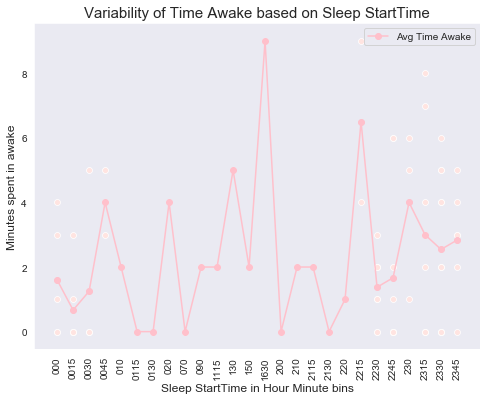

In [90]:
plt.figure(figsize = (8,6))
# plt.scatter(avg_sleep_based_start.index,avg_sleep_based_start['timeInBed'],color = 'mistyrose')
plt.plot(avg_sleep_based_start.index, avg_sleep_based_start['awake_min'],'-o',color = 'pink', label = 'Avg Time Awake')
sns.scatterplot(x=df_small['startHrMin'],y=df_small['awake_min'],color = 'mistyrose')
plt.xlabel('Sleep StartTime in Hour Minute bins', fontsize = 12)
plt.ylabel('Minutes spent in awake', fontsize = 12)
plt.title('Variability of Time Awake based on Sleep StartTime', fontsize=15)
plt.xticks(rotation=90);

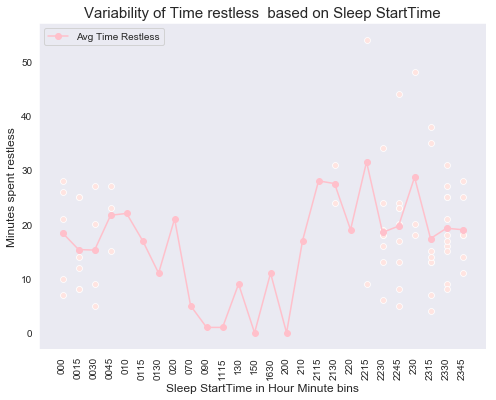

In [92]:
plt.figure(figsize = (8,6))
# plt.scatter(avg_sleep_based_start.index,avg_sleep_based_start['timeInBed'],color = 'mistyrose')
plt.plot(avg_sleep_based_start.index, avg_sleep_based_start['restless_min'],'-o',color = 'pink', label = 'Avg Time Restless')
sns.scatterplot(x=df_small['startHrMin'],y=df_small['restless_min'],color = 'mistyrose')
plt.xlabel('Sleep StartTime in Hour Minute bins', fontsize = 12)
plt.ylabel('Minutes spent restless', fontsize = 12)
plt.title('Variability of Time restless  based on Sleep StartTime', fontsize=15)
plt.xticks(rotation=90);

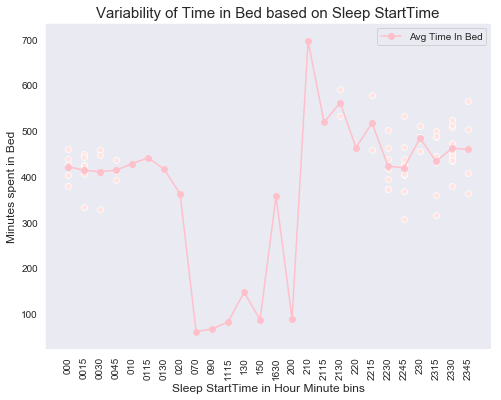

In [93]:
plt.figure(figsize = (8,6))
# plt.scatter(avg_sleep_based_start.index,avg_sleep_based_start['timeInBed'],color = 'mistyrose')
plt.plot(avg_sleep_based_start.index, avg_sleep_based_start['timeInBed'],'-o',color = 'pink', label = 'Avg Time In Bed')
sns.scatterplot(x=df_small['startHrMin'],y=df_small['timeInBed'],color = 'mistyrose')
plt.xlabel('Sleep StartTime in Hour Minute bins', fontsize = 12)
plt.ylabel('Minutes spent in Bed', fontsize = 12)
plt.title('Variability of Time in Bed based on Sleep StartTime', fontsize=15)
plt.xticks(rotation=90);

In [125]:
@interact
def show_avg_and_reg(columns=['timeInBed','awake_min','restless_min']):
    plt.figure(figsize = (8,6))
    # plt.scatter(avg_sleep_based_start.index,avg_sleep_based_start['timeInBed'],color = 'mistyrose')
    plt.plot(avg_sleep_based_start.index, avg_sleep_based_start[columns],'-o',color = 'pink', label = 'Avg Time',alpha=0.5)
    sns.scatterplot(x=df_small['startHrMin'],y=df_small[columns],color = 'mistyrose',alpha=0.6)
    plt.xlabel('Sleep StartTime in Hour Minute bins', fontsize = 12)
    plt.ylabel('Minutes Spent in Stage of Sleep', fontsize = 12)
    plt.title('Variability of Time in Stage of Sleep based on Sleep StartTime', fontsize=15)
    plt.xticks(rotation=90);

interactive(children=(Dropdown(description='columns', options=('timeInBed', 'awake_min', 'restless_min'), valu…

In [99]:
clean_df = pd.read_csv('../../Data/data_for_modeling_cleaned_20190204.csv')

In [114]:
clean_df.head()

dates  efficiency  asleep_min  awake_min  restless_min  timeInBed  \
0  2018-10-08        96.0       347.0        2.0          14.0      363.0   
1  2018-10-09        93.0       337.0        4.0          21.0      362.0   
2  2018-10-10        96.0       417.0        2.0          17.0      437.0   
3  2018-10-11        96.0       417.0        2.0          17.0      437.0   
4  2018-10-12        96.0       508.0        0.0          24.0      532.0   

   restless_rolling7  awake_rolling7  dayofweek  caffeine_mg  drink_counter  \
0                0.0             0.0          0          NaN            NaN   
1                0.0             0.0          1          NaN            NaN   
2                0.0             0.0          2          NaN            NaN   
3                0.0             0.0          3          NaN            NaN   
4                0.0             0.0          4          NaN            NaN   

  dayofwk  
0     Mon  
1    Tues  
2     Wed  
3   Thurs  
4     Fri

In [112]:
clean_df.dtypes

dates                 object
efficiency           float64
asleep_min           float64
awake_min            float64
restless_min         float64
timeInBed            float64
restless_rolling7    float64
awake_rolling7       float64
dayofweek              int64
caffeine_mg          float64
drink_counter        float64
dtype: object

In [109]:
dayofwk_map = {0:'Mon',
               1:'Tues',
               2:'Wed',
               3:'Thurs',
               4:'Fri',
               5:'Sat',
               6:'Sun'
              }

In [113]:
clean_df['dayofwk'] = clean_df['dayofweek'].map(dayofwk_map)

In [117]:
avg_sleep_dayofwk = clean_df.groupby(by = 'dayofweek')['timeInBed','awake_min','restless_min'].mean()

In [118]:
avg_sleep_dayofwk.head()

timeInBed  awake_min  restless_min
dayofweek                                     
0          415.687500   2.125000     17.062500
1          425.764706   1.529412     16.764706
2          448.687500   2.625000     18.437500
3          386.100000   2.050000     18.400000
4          440.125000   1.937500     15.437500

In [126]:
#monday = 0, sunday = 6
@interact
def show_avg_and_reg(columns=['timeInBed','awake_min','restless_min']):
    plt.figure(figsize = (8,6))
    # plt.scatter(avg_sleep_based_start.index,avg_sleep_based_start['timeInBed'],color = 'mistyrose')
    plt.plot(avg_sleep_dayofwk.index, avg_sleep_dayofwk[columns],'-o',color = 'pink', label = 'Avg Time',alpha=0.5)
    sns.scatterplot(x=clean_df['dayofweek'],y=clean_df[columns],color = 'mistyrose',alpha=0.5)
    plt.xlabel('Day of Week', fontsize = 12)
    plt.xticks(ticks=avg_sleep_dayofwk.index ,labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], rotation=90)
    plt.ylabel('Minutes Spent in Stage of Sleep', fontsize = 12)
    plt.title('Variability of Time in Stage of Sleep based on Day of Week', fontsize=15);

interactive(children=(Dropdown(description='columns', options=('timeInBed', 'awake_min', 'restless_min'), valu…